In [1]:
# 📊 ECG from GMM Visualizations Notebook
import numpy as np
import matplotlib.pyplot as plt

# ✅ Function for ECG from GMM
def ecg_gen_gmm(phi, theta0, alpha, b, theta):
    """ Generate synthetic ECG using GMM with phase shift. """
    N = len(phi)

    # ✅ Phase shift and wrapping
    phi = (phi + theta0 + np.pi) % (2 * np.pi) - np.pi

    # ✅ Phase differences for Gaussian kernels
    dtetai = (np.tile(phi, (len(theta), 1)).T - np.tile(theta, (N, 1)) + np.pi) % (2 * np.pi) - np.pi

    # ✅ Generate ECG signal using GMM
    ecg = np.sum(np.tile(alpha, (N, 1)) * np.exp(-dtetai**2 / (2 * np.tile(b, (N, 1))**2)), axis=1)

    return ecg, phi

In [2]:
# ✅ Parameters
N = 1000
fs = 500
t = np.arange(N) / fs
phi = 2 * np.pi * 1.2 * t  # Phase signal

# ✅ GMM parameters
alpha = np.array([1.0, 0.8, 0.5])
b = np.array([0.1, 0.15, 0.2])
theta = np.array([0, np.pi / 2, np.pi])

# ✅ Generate ECG from GMM
ecg, shifted_phi = ecg_gen_gmm(phi, theta0=0.2, alpha=alpha, b=b, theta=theta)

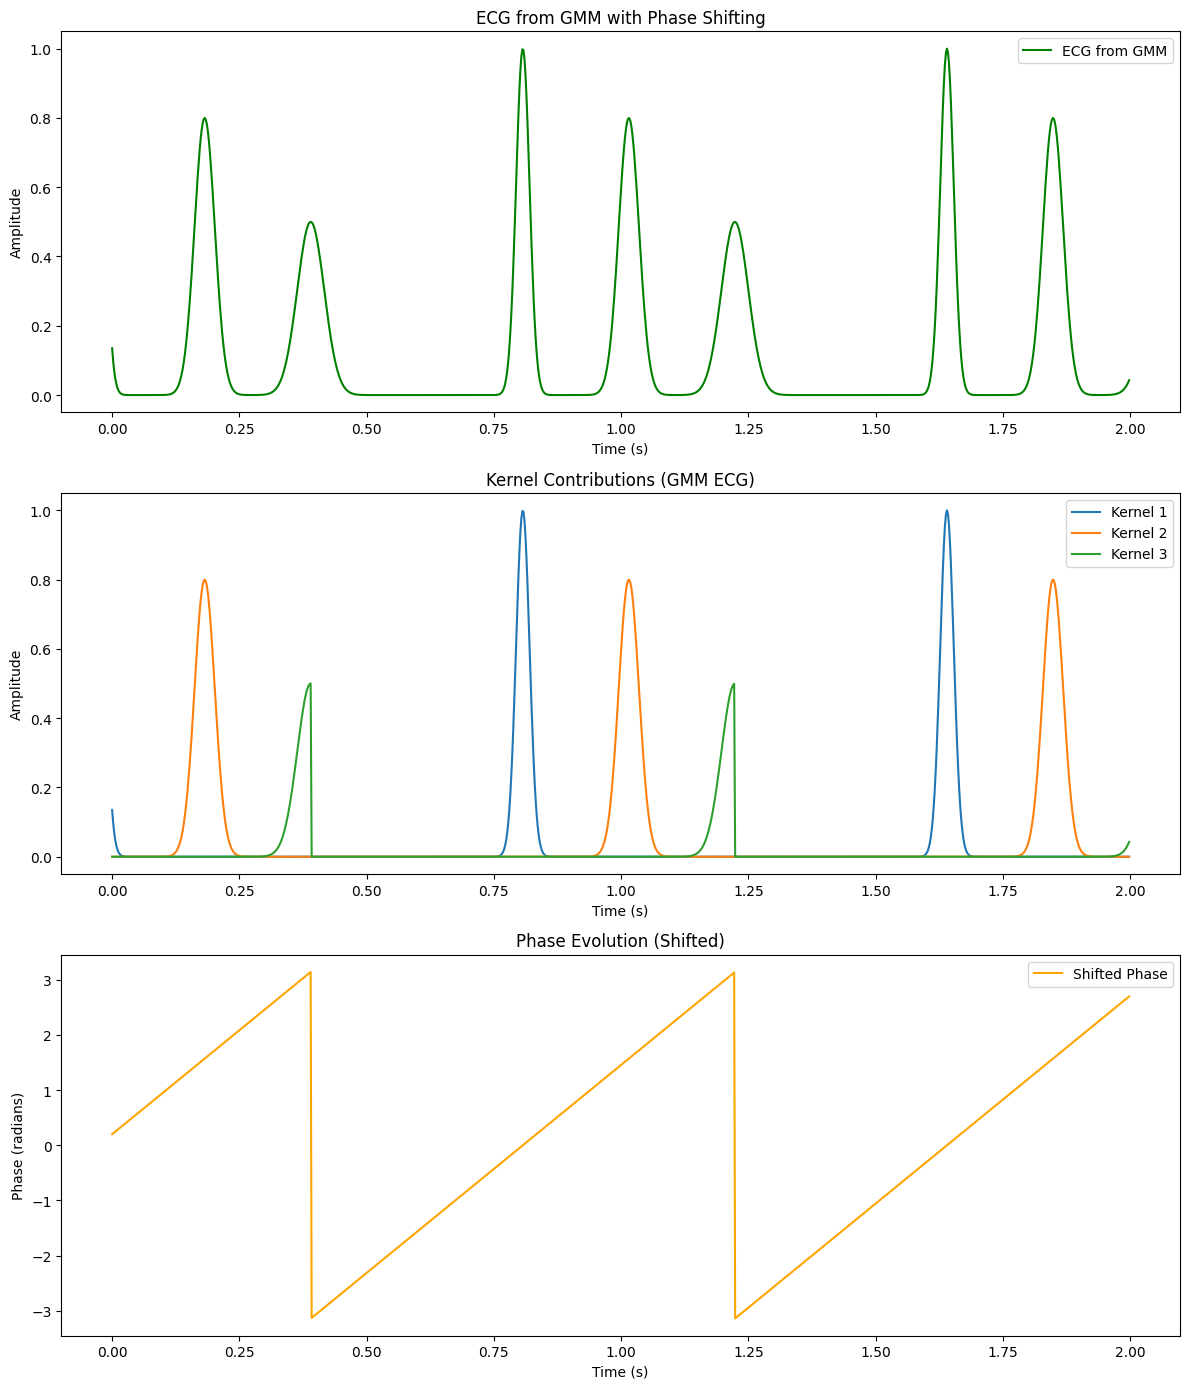

In [3]:
# ✅ Visualization
fig, axs = plt.subplots(3, 1, figsize=(12, 14))

# 🚀 Plot 1: ECG from GMM
axs[0].plot(t, ecg, label='ECG from GMM', color='green')
axs[0].set_title('ECG from GMM with Phase Shifting')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# 🚀 Plot 2: Individual Kernel Contributions
for i in range(len(alpha)):
    kernel_gmm = alpha[i] * np.exp(-(shifted_phi - theta[i])**2 / (2 * b[i]**2))
    axs[1].plot(t, kernel_gmm, label=f'Kernel {i+1}')
axs[1].set_title('Kernel Contributions (GMM ECG)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# 🚀 Plot 3: Phase Evolution (Shifted)
axs[2].plot(t, shifted_phi, label='Shifted Phase', color='orange')
axs[2].set_title('Phase Evolution (Shifted)')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Phase (radians)')
axs[2].legend()

plt.tight_layout()
plt.show()